In [30]:
# import a bunch of stuff

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense

from tensorflow.keras.datasets import mnist
import tensorflow as tf

In [31]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [32]:
X_train.shape

(60000, 28, 28)

In [33]:
X_test.shape

(10000, 28, 28)

## Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


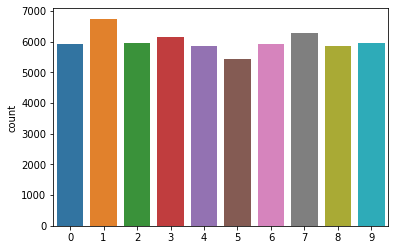

In [34]:
plt.figure()
g = sns.countplot(y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


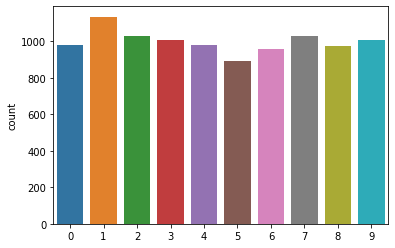

In [35]:
plt.figure()
t = sns.countplot(y_test)

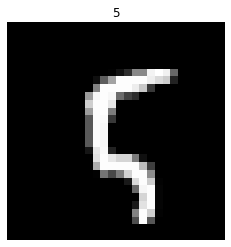

In [36]:
id = 100
img = X_train[id]
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(y_train[id])
plt.axis("off")
plt.show()

In [37]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [38]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [39]:
# Reshape. 4d (Batch_size, height, width, channel)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [40]:
model = Sequential()
model.add(Conv2D(filters= 20, kernel_size= (3, 3), padding = 'Same', activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 10, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=16, activation = "relu"))
model.add(Dropout(rate=0.2))
model.add(Dense(units=10, activation='softmax'))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 20)        200       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 10)        1810      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 10)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 490)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                7856      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)               

In [50]:
from keras.optimizers import Adam, SGD, Optimizer
optimizer = SGD(learning_rate=0.001, momentum=0.99)

In [51]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
BATCH_SIZE = 32
EPOCHS = 10

In [ ]:
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3024 - accuracy: 0.1084 - val_loss: 2.3020 - val_accuracy: 0.1028
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3019 - accuracy: 0.1114 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3015 - accuracy: 0.1134 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3016 - accuracy: 0.1115 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3018 - accuracy: 0.1124 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3020 - accuracy: 0.1125 - val_loss: 2.3025 - val_accuracy: 0.1135
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3023 - accuracy: 0.1114 - val_loss: 2.3016 - val_accuracy:

In [ ]:
plt.plot(history.history['accuracy'])